<a href="https://colab.research.google.com/github/vigneshiitm/Hyperspectral/blob/main/Hyperpectral_Dimensionality_Reduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style('whitegrid');

## Download HSI Data

In [2]:
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

--2021-01-26 10:49:55--  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat’

PaviaU.mat           30%[=====>              ]  10.26M   337KB/s    in 34s     

2021-01-26 10:50:30 (313 KB/s) - Connection closed at byte 10763352. Retrying.

--2021-01-26 10:50:31--  (try: 2)  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 34806917 (33M), 24043565 (23M) remaining
Saving to: ‘PaviaU.mat’

PaviaU.mat           61%[++++++=====>        ]  20.52M   303KB/s    in 35s     

2021-01-26 10:51:07 (298 KB/s) - Connection closed at byte 21518781. Retrying.

--2021-01-26 10:51:09--  (try: 3)  http://www.ehu.eus/ccwintco/uploads/e

In [3]:
!ls

PaviaU_gt.mat  PaviaU.mat  sample_data


## Read the Data

In [4]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


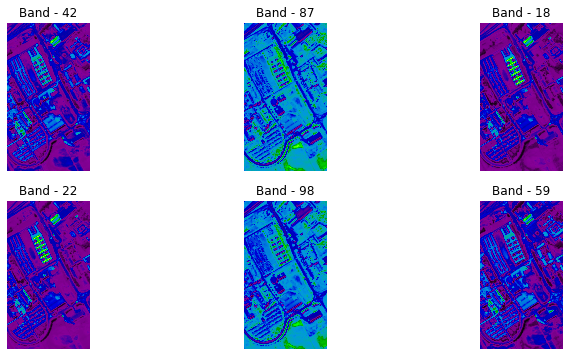

In [48]:

fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')

In [6]:
# # Visualizing the Ground truth of the HSI
# cls = px.imshow(y, color_continuous_scale='inferno',)
                
# cls.update_layout(title = 'Gound Truth', coloraxis_showscale=True)
# cls.update_xaxes(showticklabels=False)
# cls.update_yaxes(showticklabels=False)
# cls.show()
# # py.plot(cls, filename = 'ground_truth', auto_open=True)

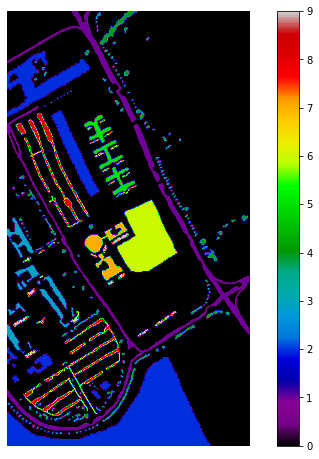

In [7]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()

## Convert the dataset into csv 

In [8]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)


In [9]:
df.shape

(207400, 104)

In [10]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band65,band66,band67,band68,band69,band70,band71,band72,band73,band74,band75,band76,band77,band78,band79,band80,band81,band82,band83,band84,band85,band86,band87,band88,band89,band90,band91,band92,band93,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103,class
0,647,499,464,371,291,319,365,322,296,305,277,219,219,222,201,162,157,183,204,194,198,216,249,284,294,322,338,342,336,342,362,365,348,341,324,316,293,274,251,244,...,192,227,287,376,493,633,763,913,1149,1442,1759,2102,2425,2689,2895,3058,3196,3252,3195,3297,3542,3550,3537,3545,3514,3477,3468,3433,3408,3420,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,328,326,275,215,197,217,239,258,246,233,241,261,279,300,329,344,341,362,362,367,368,359,345,344,327,302,281,271,270,261,...,152,190,242,301,391,505,633,774,960,1191,1454,1737,2001,2209,2363,2484,2594,2613,2541,2588,2821,2839,2738,2690,2678,2673,2712,2725,2657,2605,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,278,255,232,207,210,209,168,139,137,154,168,202,225,231,244,257,263,262,266,276,285,291,285,272,271,241,208,194,179,157,...,116,153,188,243,322,413,492,591,737,933,1125,1327,1519,1666,1790,1934,2029,2034,2010,2069,2191,2233,2245,2249,2255,2250,2249,2239,2239,2282,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,217,215,187,161,152,136,124,122,127,126,125,123,147,188,208,203,202,206,219,235,238,227,217,215,216,201,190,167,149,162,...,129,174,245,338,455,585,720,850,1013,1225,1460,1702,1938,2157,2317,2433,2525,2552,2493,2554,2733,2781,2748,2748,2737,2710,2681,2642,2645,2684,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,207,154,123,95,106,102,101,123,154,170,191,210,216,256,289,325,348,357,361,362,363,370,386,369,344,331,312,308,288,263,...,173,220,292,382,488,592,692,834,1032,1236,1461,1698,1876,2007,2118,2213,2288,2267,2192,2274,2448,2454,2387,2388,2441,2435,2454,2457,2430,2423,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Columns: 104 entries, band1 to class
dtypes: uint16(103), uint8(1)
memory usage: 40.9 MB


In [12]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band64,band65,band66,band67,band68,band69,band70,band71,band72,band73,band74,band75,band76,band77,band78,band79,band80,band81,band82,band83,band84,band85,band86,band87,band88,band89,band90,band91,band92,band93,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.00000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,838.761900,833.532261,833.957903,840.022734,846.49027,849.024166,858.274605,869.041553,879.729687,893.426895,909.047888,929.773245,950.449826,971.719296,999.330747,1030.487247,1047.342570,1056.144036,1064.008298,1078.164397,1094.337912,1102.542194,1106.111823,1112.674807,1116.410511,1117.368182,1116.463134,1115.816958,1115.709667,1116.513134,...,1151.786355,1167.364634,1196.965762,1242.671355,1300.318158,1374.747102,1451.015511,1524.074653,1596.037252,1671.897768,1753.491707,1835.790125,1922.294619,1996.554687,2063.378761,2114.096861,2155.272912,2194.415844,2216.565135,2212.345323,2193.142758,2210.446374,2232.427758,2245.315858,2245.806716,2246.235497,2253.048669,2267.367917,2265.880313,2257.890217,2262.503269,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,654.150867,663.504620,675.055950,685.877447,694.17722,700.069128,706.904269,710.988908,712.225631,712.766144,711.116605,707.754548,702.056494,696.329369,694.323524,695.658318,691.457118,685.112863,680.143249,679.484331,680.548766,678.991678,678.109958,681.818279,686.403595,691.668118,696.466303,700.002590,701.182840,700.248079,...,736.586216,724.016756,708.647458,695.452171,674.953291,653.314752,632.543791,615.486140,603.333136,597.054264,605.347893,629.388781,667.016967,708.788296,750.020598,785.134096,814.465202,840.078731,856.606082,852.494726,820.735878,830.340437,856.128856,869.604098,871.258687,870.414926,870.642830,872.611679,868.905723,863.646853,863.285910,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,26.000000,37.000000,41.000000,59.000000,71.000000,72.0000

## Principal Component Analysis(PCA)


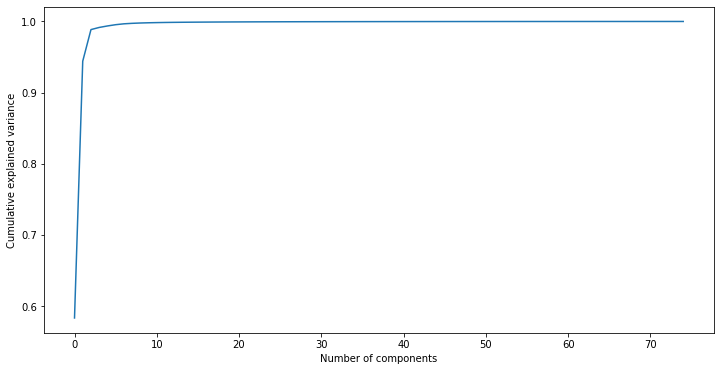

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 75)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()


Select 8 as the no.of components for PCA

In [14]:
pca = PCA(n_components = 8)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,9)]+['class']

In [15]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,class
0,-5150.190044,6795.052770,1532.351461,410.030134,-259.856157,-832.898970,293.239776,278.385197,0
1,-6082.245760,3158.592195,1463.194744,154.617093,-438.871878,-496.202149,362.925839,187.355440,0
2,-7214.505405,1158.875812,1400.817899,410.044063,38.052916,-560.804196,-140.004203,8.847597,0
3,-6566.279360,3398.894763,1126.024772,496.775042,-302.415250,-409.493899,218.391586,-2.957286,0
4,-6496.967970,2154.797771,1035.954575,27.247705,-194.891403,-189.044607,-71.142484,-97.987797,0


### Display the bands after PCA

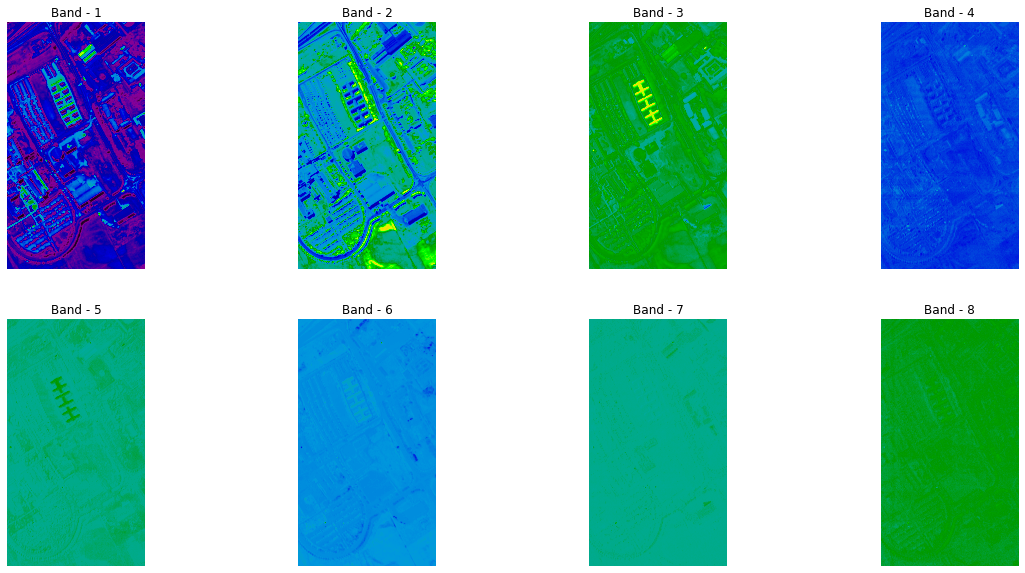

In [16]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(610, 340), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

In [17]:
# saving to .csv
q.to_csv('paviaU_8_PCA.csv', index=False)

In [18]:
!pip install earthpy

     |████████████████████████████████| 1.4MB 4.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.1MB 1.5MB/s 
     |████████████████████████████████| 972kB 42.8MB/s 
     |████████████████████████████████| 14.8MB 153kB/s 
     |████████████████████████████████| 6.5MB 41.6MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365089 sha256=dceb641121ac62db1fd190a315f70507225c7d4f29716f2541b154cba53c985e
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


# Autoencoder

In [19]:
import matplotlib.pyplot as plt

import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from tqdm import tqdm
from numpy.random import seed
from time import time


In [20]:
ncol = 103

In [21]:
encoding_dim = 8

input_dim = Input(shape = (ncol, ), name = 'InputLayer')

# Encoder Layers
encoded1 = Dense(100, activation = 'relu', name = 'EncodeLayer1')(input_dim)
encoded2 = Dense(90, activation = 'relu', name = 'EncodeLayer2')(encoded1)
encoded3 = Dense(85, activation = 'relu', name = 'EncodeLayer3')(encoded2)
encoded4 = Dense(80, activation = 'relu', name = 'EncodeLayer4')(encoded3)
encoded5 = Dense(75, activation = 'relu', name = 'EncodeLayer5')(encoded4)
encoded6 = Dense(70, activation = 'relu', name = 'EncodeLayer6')(encoded5)

# Coded Part
encoded7 = Dense(encoding_dim, activation = 'linear', name = 'CodeLayer')(encoded6)

# Decoder Layers
decoded1 = Dense(70, activation = 'relu', name = 'DecodeLayer1')(encoded7)
decoded2 = Dense(75, activation = 'relu', name = 'DecodeLayer2')(decoded1)
decoded3 = Dense(80, activation = 'relu', name = 'DecodeLayer3')(decoded2)
decoded4 = Dense(85, activation = 'relu', name = 'DecodeLayer4')(decoded3)
decoded5 = Dense(90, activation = 'relu', name = 'DecodeLayer5')(decoded4)
decoded6 = Dense(100, activation = 'relu', name = 'DecodeLayer6')(decoded5)
decoded7 = Dense(ncol, activation = 'sigmoid', name = 'OutputLayer')(decoded6)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded7)

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 103)]             0         
_________________________________________________________________
EncodeLayer1 (Dense)         (None, 100)               10400     
_________________________________________________________________
EncodeLayer2 (Dense)         (None, 90)                9090      
_________________________________________________________________
EncodeLayer3 (Dense)         (None, 85)                7735      
_________________________________________________________________
EncodeLayer4 (Dense)         (None, 80)                6880      
_________________________________________________________________
EncodeLayer5 (Dense)         (None, 75)                6075      
_________________________________________________________________
EncodeLayer6 (Dense)         (None, 70)                5320  

In [22]:

# Compile the Model

autoencoder.compile(optimizer = 'adam', 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

In [23]:
## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

In [24]:
checkpoint = ModelCheckpoint(filepath = 'Pavia_University_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)


In [25]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(df.iloc[:, :-1])
X_test_minmax = min_max_scaler.transform(df.iloc[:, :-1])


def data_pipeline(df):
  data = tf.data.Dataset.from_tensor_slices(df)
  return data

def create_data_pairs(x):
  return x,x

def create_test_data(x):
  return x

In [26]:
batch_size = 100
dataset = data_pipeline(X_train_minmax).map(create_data_pairs).repeat().batch(batch_size)

In [28]:
step = df.shape[0]/batch_size

In [30]:
hist = autoencoder.fit(dataset,epochs = 100, steps_per_epoch = step,callbacks=[early_stop,checkpoint])


Epoch 1/100
2074/2074 [==============================] - 12s 4ms/step - loss: 0.0091 - mean_squared_logarithmic_error: 0.0058
Epoch 2/100
2074/2074 [==============================] - 9s 4ms/step - loss: 2.5339e-04 - mean_squared_logarithmic_error: 1.7044e-04
Epoch 3/100
2074/2074 [==============================] - 10s 5ms/step - loss: 2.5503e-04 - mean_squared_logarithmic_error: 1.7026e-04
Epoch 4/100
2074/2074 [==============================] - 9s 4ms/step - loss: 2.4064e-04 - mean_squared_logarithmic_error: 1.6128e-04
Epoch 5/100
2074/2074 [==============================] - 10s 5ms/step - loss: 1.8718e-04 - mean_squared_logarithmic_error: 1.2845e-04
Epoch 6/100
2074/2074 [==============================] - 9s 4ms/step - loss: 2.3565e-04 - mean_squared_logarithmic_error: 1.5671e-04
Epoch 7/100
2074/2074 [==============================] - 10s 5ms/step - loss: 1.8862e-04 - mean_squared_logarithmic_error: 1.2878e-04
Epoch 8/100
2074/2074 [==============================] - 10s 5ms/step - l

In [31]:
test_dataset = data_pipeline(X_test_minmax).map(create_test_data).batch(1)

In [32]:
encoder = Model(inputs = input_dim, outputs = encoded7)

# Summary
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 103)]             0         
_________________________________________________________________
EncodeLayer1 (Dense)         (None, 100)               10400     
_________________________________________________________________
EncodeLayer2 (Dense)         (None, 90)                9090      
_________________________________________________________________
EncodeLayer3 (Dense)         (None, 85)                7735      
_________________________________________________________________
EncodeLayer4 (Dense)         (None, 80)                6880      
_________________________________________________________________
EncodeLayer5 (Dense)         (None, 75)                6075      
_________________________________________________________________
EncodeLayer6 (Dense)         (None, 70)                5320

In [33]:
for item in test_dataset.take(1):
  print(item)

tf.Tensor(
[[0.080875   0.062375   0.058      0.046375   0.036375   0.039875
  0.045625   0.04025    0.037      0.038125   0.034625   0.027375
  0.027375   0.02775    0.025125   0.02025    0.019625   0.022875
  0.0255     0.02425    0.02475    0.027      0.031125   0.0355
  0.03675    0.04025    0.04225    0.04275    0.042      0.04275
  0.04525    0.045625   0.0435     0.042625   0.0405     0.0395
  0.036625   0.03425    0.031375   0.0305     0.032875   0.031
  0.0295     0.03175    0.031875   0.03       0.027875   0.025375
  0.02525    0.023875   0.023125   0.025      0.025375   0.022625
  0.021      0.02175    0.023125   0.023375   0.020625   0.018875
  0.018      0.0175     0.018625   0.021125   0.024      0.028375
  0.03466834 0.04509018 0.05974449 0.0761224  0.09117167 0.1095615
  0.13726231 0.17290957 0.21279011 0.25661709 0.29732796 0.336125
  0.361875   0.38225    0.3995     0.4065     0.39130986 0.40112059
  0.43282443 0.44375    0.442125   0.443125   0.43925    0.434625
  0.

In [34]:
print(encoder.predict(X_test_minmax))

[[-0.9249851   0.05665672  0.5141917  ... -0.68662673 -0.6377024
   1.4936143 ]
 [-0.7913497   0.00775043  0.53214926 ... -0.93994975 -0.74034333
   1.33114   ]
 [-0.7945917  -0.04935518  0.5285785  ... -1.2373576  -0.80204
   1.5595644 ]
 ...
 [-0.3306905  -0.01079977  0.12190096 ... -0.55819523 -0.13540153
   0.8683132 ]
 [-0.37833828  0.00638322  0.20545705 ... -0.603999   -0.26068354
   0.80610085]
 [-0.40893263  0.00186375  0.20303892 ... -0.57602525 -0.23070107
   0.8850808 ]]


In [35]:
encoded_X = pd.DataFrame(encoder.predict(X_test_minmax))

# Add Column Names
encoded_X = encoded_X.add_prefix('feature_')

# Add the class labels for classification purposes

encoded_X['class'] = df.loc[:,['class']]

# Save Data
encoded_X.to_csv('AE_PU_data.csv')

In [36]:
encoded_X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,class
0,-0.924985,0.056657,0.514192,0.052611,0.798850,-0.686627,-0.637702,1.493614,0
1,-0.791350,0.007750,0.532149,-0.365153,0.326095,-0.939950,-0.740343,1.331140,0
2,-0.794592,-0.049355,0.528579,-0.727578,0.075459,-1.237358,-0.802040,1.559564,0
3,-0.770473,-0.048996,0.434621,-0.397432,0.295140,-1.020432,-0.587583,1.598093,0
4,-0.635948,-0.047674,0.346635,-0.501300,0.122913,-0.973129,-0.493139,1.422175,0
...,...,...,...,...,...,...,...,...,...
207395,-0.240317,-0.037620,0.029637,-0.515997,-0.154144,-0.602542,-0.062675,0.872490,0
207396,-0.282754,-0.014840,0.087324,-0.441416,-0.079563,-0.583407,-0.121522,0.831131,0
207397,-0.330691,-0.010800,0.121901,-0.329467,0.031771,-0.558195,-0.135402,0.868313,0
207398,-0.378338,0.006383,0.205457,-0.387089,0.011172,-0.603999,-0.260684,0.806101,0


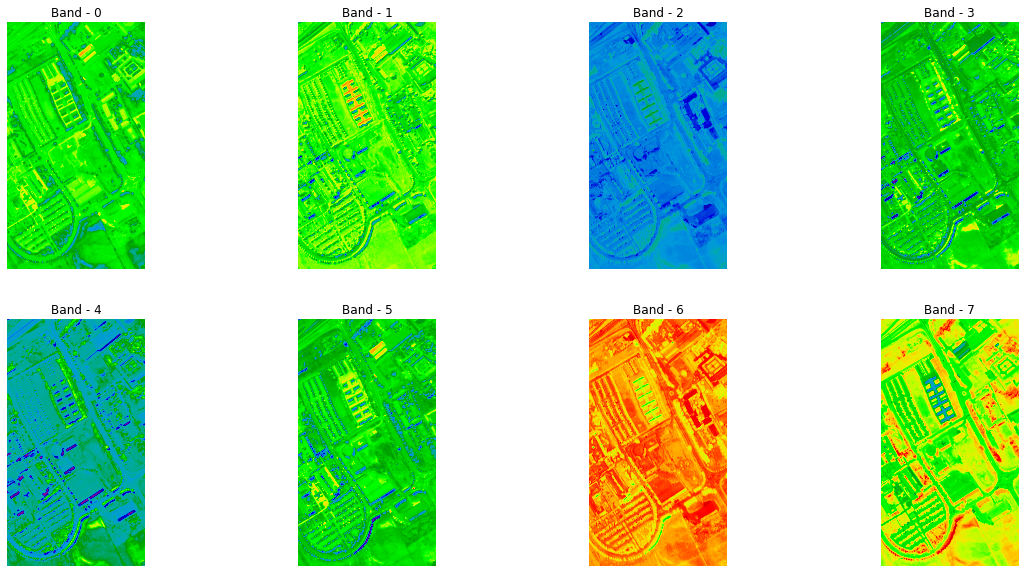

In [39]:
fig = plt.figure(figsize = (20, 10))

for i in range(0, 1+7):
    fig.add_subplot(2,4, i+1)
    plt.imshow(encoded_X.loc[:, f'feature_{i}'].values.reshape(610, 340), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')